In [1]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
ls

 Volume in drive C is B
 Volume Serial Number is 1E91-9C51

 Directory of C:\Users\91767\Downloads\ASSIGNMENTS\Untitled Folder

14-01-2023  16:51    <DIR>          .
14-01-2023  00:11    <DIR>          ..
14-01-2023  16:33    <DIR>          .ipynb_checkpoints
14-01-2023  16:33           156,518 CLUSTERING (CRIME DATA).ipynb
06-01-2023  21:06             1,334 crime_data.csv
14-01-2023  16:48           157,167 EastWestAirlines.csv
14-01-2023  16:47           245,341 EastWestAirlines.xlsx
14-01-2023  16:51             9,926 Untitled.ipynb
               5 File(s)        570,286 bytes
               3 Dir(s)  191,349,956,608 bytes free


In [3]:
EW = pd.read_csv("EastWestAirlines.csv")
EW.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [4]:
EW.shape

(3999, 12)

In [5]:
def norm_func(i):
    x = (i - i.min())/(i.max() - i.min())
    return x

In [6]:
df_norm = norm_func(EW.iloc[:,1:])

In [7]:
df_norm.head(3)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.016508,0.0,0.0,0.0,0.0,0.000660,0.011628,0.0,0.0,0.843742,0.0
1,0.011288,0.0,0.0,0.0,0.0,0.000815,0.023256,0.0,0.0,0.839884,0.0
2,0.024257,0.0,0.0,0.0,0.0,0.015636,0.046512,0.0,0.0,0.847842,0.0


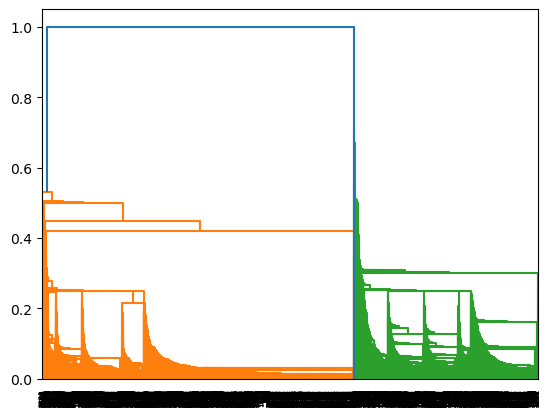

In [8]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'single'))

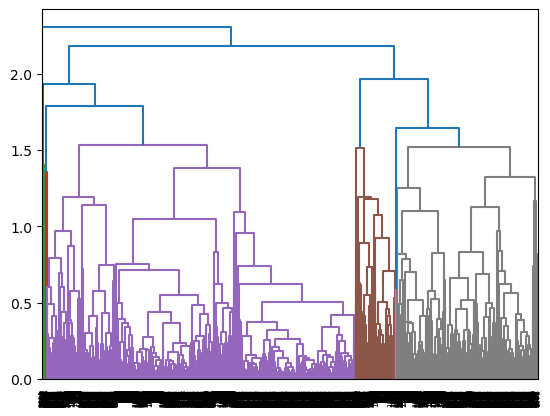

In [9]:
dendrogram = sch.dendrogram(sch.linkage(df_norm, method = 'complete'))

In [10]:
??AgglomerativeClustering

In [11]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')

In [12]:
hc.fit_predict(df_norm)

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [13]:
y_hc = hc.fit_predict(df_norm)

In [14]:
EW['h_clusterid'] = y_hc
EW

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,0


In [19]:
EW.groupby(["h_clusterid"])["ID#"].apply(lambda x:tuple(x))

h_clusterid
0    (1, 2, 3, 4, 6, 7, 11, 13, 14, 15, 23, 24, 25,...
1    (5, 8, 9, 10, 12, 16, 17, 18, 19, 20, 21, 22, ...
2                                              (3606,)
3                                              (2862,)
4                                               (915,)
Name: ID#, dtype: object

In [22]:
EW[EW["ID#"].isin([8, 10, 99, 100, 112, 196])]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
7,8,20856,0,1,1,1,5250,4,250,1,6938,1,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1,1
96,99,57346,0,1,1,1,5560,23,0,0,6766,0,0
97,100,102062,0,4,1,1,44247,16,0,0,6758,0,0
109,112,15098,0,4,1,1,32917,26,550,3,6737,1,1
192,196,386061,0,5,1,1,107813,24,0,0,7500,1,1


# ANOTHER METHOD OF Hierarchical Clustering 

In [23]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering

In [24]:
??pdist

In [25]:
xdist = pdist(df_norm,metric="euclidean")

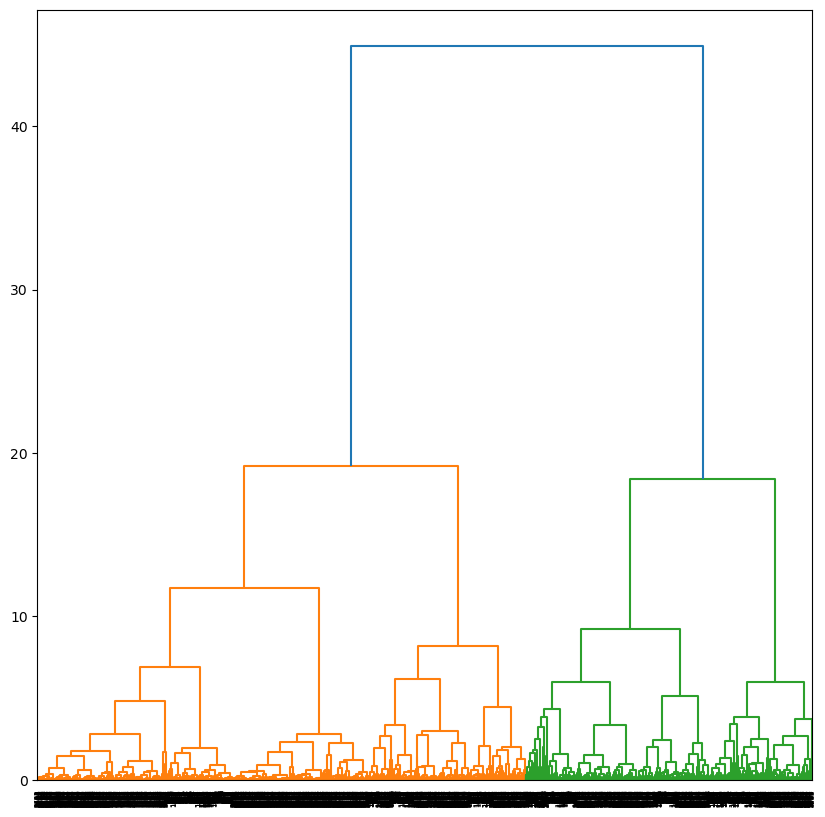

In [29]:
linked = linkage(xdist, 'ward')

plt.figure(figsize=(10,10))
dendrogram(linked,orientation='top',distance_sort='descending',
          show_leaf_counts=True)
plt.show()

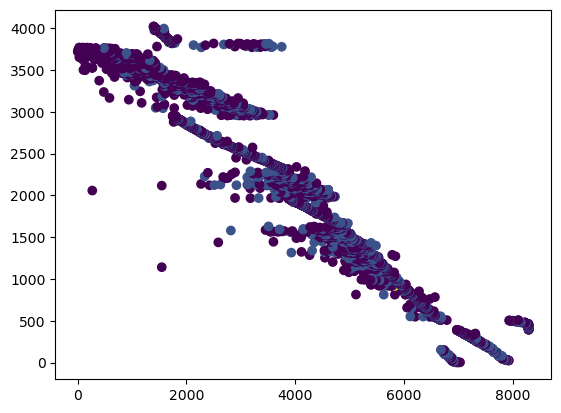

In [31]:
plt.scatter(EW.iloc[:,-3],EW.iloc[:,0],c=y_hc)


# KMEANS

In [34]:
model_kmeans = KMeans(n_clusters = 10)
airlines_scaled = model_kmeans.fit(df_norm)

In [35]:
model_kmeans.labels_

array([1, 1, 1, ..., 0, 5, 5])

In [36]:
model = pd.Series(model_kmeans.labels_)

In [38]:
EW["labels"]=pd.Series(model_kmeans.labels_)

In [41]:
EW.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,labels
0,1,28143,0,1,1,1,174,1,0,0,7000,0,0,1
1,2,19244,0,1,1,1,215,2,0,0,6968,0,0,1
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,0,1


In [42]:
EW.groupby(["labels"])["ID#"].apply(lambda x:tuple(x))

labels
0    (1340, 1383, 1439, 1509, 1534, 1560, 1588, 159...
1    (1, 2, 3, 4, 6, 11, 13, 14, 15, 23, 24, 25, 26...
2    (7, 31, 33, 45, 57, 59, 61, 68, 73, 74, 76, 78...
3    (12, 21, 82, 88, 97, 103, 108, 124, 129, 150, ...
4    (8, 18, 22, 30, 37, 40, 43, 46, 48, 54, 58, 83...
5    (1141, 1969, 2058, 2137, 2208, 2220, 2253, 227...
6    (1254, 1438, 1488, 1565, 1570, 1574, 1581, 158...
7    (1315, 1580, 1591, 1592, 1594, 1629, 1800, 181...
8    (5, 9, 10, 16, 17, 19, 20, 29, 36, 39, 42, 44,...
9    (814, 931, 932, 992, 993, 1093, 1104, 1109, 11...
Name: ID#, dtype: object

In [43]:
model_kmeans.cluster_centers_

array([[ 4.04552320e-02,  1.32424312e-02,  6.26623377e-01,
         5.20417043e-18,  8.11688312e-04,  1.19811000e-01,
         2.19042585e-01,  1.78744739e-02,  3.19774565e-02,
         3.65022908e-01,  1.00000000e+00],
       [ 3.19329032e-02,  6.17912559e-03,  3.35731415e-02,
         4.79616307e-03,  5.99520384e-04,  1.24211411e-02,
         7.84953433e-02,  7.04981655e-03,  1.20809013e-02,
         8.02255712e-01, -3.88578059e-16],
       [ 8.08807448e-02,  4.89273971e-03,  6.76229508e-01,
         9.54097912e-18,  6.55737705e-03,  1.29019903e-01,
         1.99580633e-01,  7.16391900e-03,  1.29291680e-02,
         7.32205386e-01, -3.88578059e-16],
       [ 1.06439189e-01,  2.15247528e-02,  9.92990654e-01,
         2.60208521e-18,  2.33644860e-02,  3.18279971e-01,
         2.78363399e-01,  3.51717510e-02,  5.99541527e-02,
         6.77991522e-01,  1.00000000e+00],
       [ 6.17952747e-02,  3.23767118e-02,  3.91104294e-02,
         1.53374233e-02,  4.60122699e-03,  3.41935459e-02,
  

# INFERENCES

In [44]:
EW.columns

Index(['ID#', 'Balance', 'Qual_miles', 'cc1_miles', 'cc2_miles', 'cc3_miles',
       'Bonus_miles', 'Bonus_trans', 'Flight_miles_12mo', 'Flight_trans_12',
       'Days_since_enroll', 'Award?', 'h_clusterid', 'labels'],
      dtype='object')

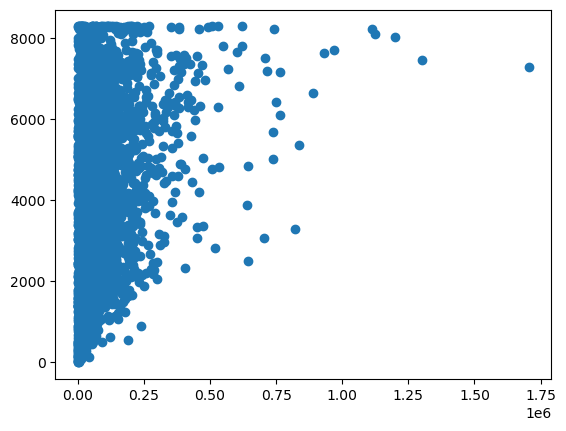

In [45]:
plt.scatter(EW["Balance"],EW["Days_since_enroll"],cmap=plt.cm.Accent)

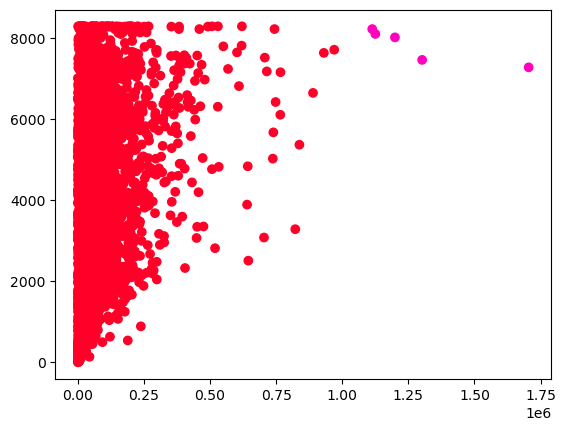

In [48]:
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage = "complete")
plt.scatter(EW["Balance"],EW["Days_since_enroll"],c=cluster.fit_predict(EW.iloc[:,[1,-4]]),cmap=plt.cm.gist_rainbow)

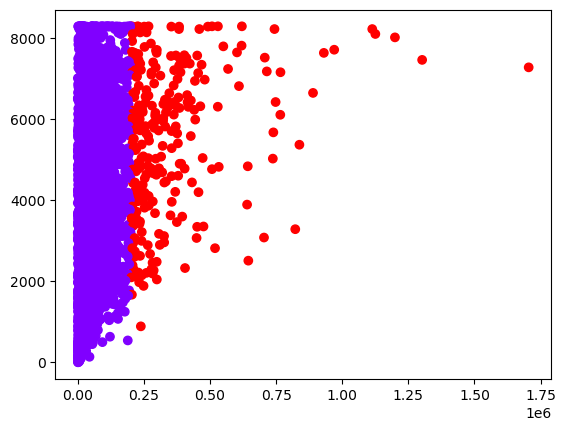

In [50]:
#using kmeans
model = KMeans(n_clusters = 2, max_iter=600, algorithm = 'auto')
model.fit(EW.iloc[:,[1,-4]])
plt.scatter(EW["Balance"],EW["Days_since_enroll"],c=model.labels_,cmap=plt.cm.rainbow)

# DBSCAN

In [52]:
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import MinMaxScaler

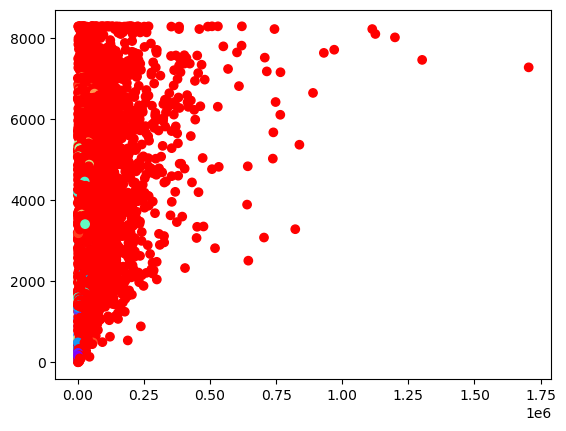

In [54]:
dbs=DBSCAN(min_samples=2,eps=0.2)
claas_pr=dbs.fit_predict(EW.iloc[:,1:5])
plt.scatter(EW["Balance"],EW["Days_since_enroll"],c=claas_pr,cmap=plt.cm.rainbow_r)

# Finding the optimal number of clusters 

In [55]:
EW1=pd.read_csv("EastWestAirlines.csv")

In [56]:
EW1.head(3)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0


In [57]:
nc = [1,2,3,4,5,6,7,8,9]
iner = []
for i  in nc:
    km=KMeans(i)
    km.fit(EW1.iloc[:,[1,-2]])
    iner.append(km.inertia_)

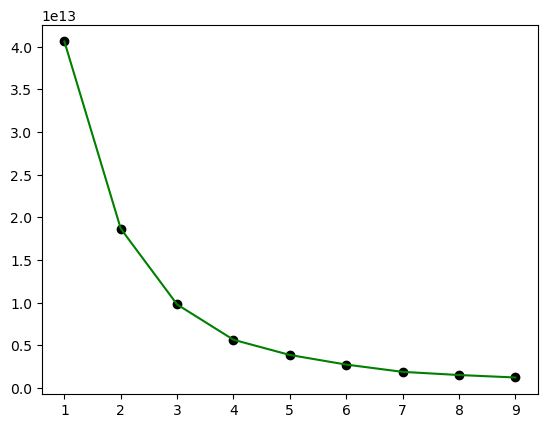

In [59]:
plt.plot(nc,iner,color="green")
plt.scatter(nc,iner,color="black")
plt.show()

# SILHOUETTE SCORE

In [60]:
from sklearn.metrics import silhouette_score as sil

In [62]:
nc=[2,3,4,5,6,7,8,9]
sc_score=[]    
for i in nc:
    hc = AgglomerativeClustering(n_clusters=i, affinity = 'euclidean', linkage = 'complete')

    y=hc.fit_predict(EW1.iloc[:,[1,-2]])
    sc_score.append(sil(EW1.iloc[:,[1,-2]],y))

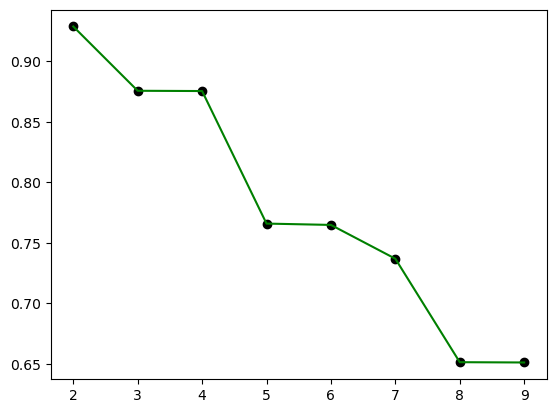

In [64]:
plt.plot(nc,sc_score,color="green")
plt.scatter(nc,sc_score,color="black")
plt.show()